# K-Nearest Neighbors (K-NN) Classifier
In this notebook, we will implement the K-Nearest Neighbors (KNN) algorithm to classify users based on their Age and Estimated Salary. We will go step by step, just like the Logistic Regression notebook: importing libraries, preparing the dataset, training the model, evaluating performance, and visualizing results.

## 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Importing the dataset

In [2]:
dataset = pd.read_csv('../data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## 4. Feature Scaling
KNN uses distance-based calculations, so it is important to scale the features.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Training the K-NN model on the Training set

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

## 6. Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)
y_pred[:10]  # Show first 10 predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

## 7. Making the Confusion Matrix and Accuracy Score

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('\nAccuracy:', ac)
print('\nClassification Report:\n', cr)

Confusion Matrix:
 [[55  3]
 [ 1 21]]

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



## 8. Bias and Variance
We can check how well the model performs on training vs test set.

In [8]:
bias = classifier.score(X_train, y_train)
variance = classifier.score(X_test, y_test)
print('Training Accuracy (Bias):', bias)
print('Test Accuracy (Variance):', variance)

Training Accuracy (Bias): 0.909375
Test Accuracy (Variance): 0.95


## 9. Visualising the Training set results

C:\Users\MUBASSHIR\AppData\Local\Temp\ipykernel_13104\3527347499.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


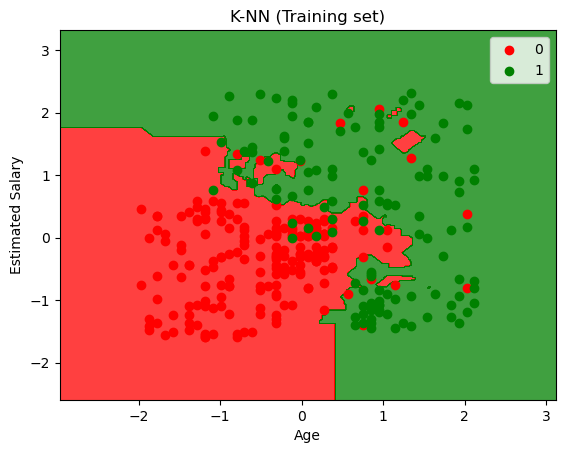

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 10. Visualising the Test set results

C:\Users\MUBASSHIR\AppData\Local\Temp\ipykernel_13104\4098460493.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


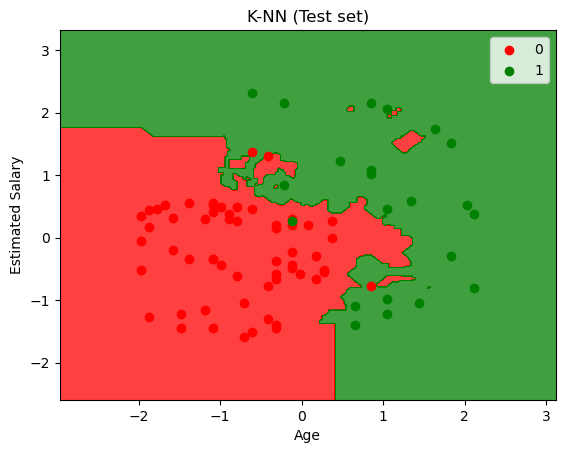

In [10]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 11. Summary
- K-Nearest Neighbors is a **lazy learning algorithm** that uses distance to classify points.
- We saw how feature scaling is important for KNN.
- The model was evaluated using confusion matrix, accuracy, and classification report.
- Visualizations showed decision boundaries for both training and test sets.
- Bias vs Variance comparison helped us understand generalization performance.